In [1]:
import numpy as np

In [2]:
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1,3], [2.3, 2.7], [2, 1.6], [1, 1.1], [1.5, 1.6], [1.1, 0.9]])
X

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [3]:
X.shape

(10, 2)

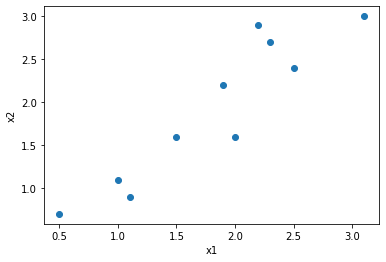

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [6]:
#Mean
xbar = X.mean(axis=0)
xbar

array([1.81, 1.91])

In [8]:
sigma=np.std(X,axis=0,ddof=1) (#ddof = degree of freedom)
sigma

array([0.78521052, 0.84649605])

In [9]:
Z=(X-xbar)/sigma
Z

array([[ 0.87874523,  0.57885681],
       [-1.6683424 , -1.42942192],
       [ 0.49668209,  1.16952702],
       [ 0.11461894,  0.34258872],
       [ 1.64287153,  1.28766107],
       [ 0.62403647,  0.93325894],
       [ 0.24197333, -0.36621553],
       [-1.03157049, -0.95688575],
       [-0.39479858, -0.36621553],
       [-0.90421611, -1.19315383]])

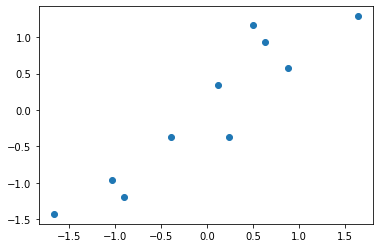

In [12]:
plt.scatter(Z[:,0],Z[:,1])
plt.show()

In [13]:
np.round(Z.mean(axis=0), 2)

array([-0.,  0.])

In [14]:
Z.std(axis=0, ddof =1)

array([1., 1.])

In [18]:
cov_mat = np.cov(X,rowvar = False)
cov_mat

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

In [19]:
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

In [20]:
eigen_values

array([0.0490834 , 1.28402771])

In [21]:
eigen_vectors

array([[-0.73517866,  0.6778734 ],
       [ 0.6778734 ,  0.73517866]])

In [24]:
sorted_index = np.argsort(eigen_values)[::-1]
sorted_index

array([1, 0])

In [25]:
sorted_eigenvectors = eigen_vectors[:, sorted_index]
sorted_eigenvectors

array([[ 0.6778734 , -0.73517866],
       [ 0.73517866,  0.6778734 ]])

In [26]:
11*eigen_values[1]/sum(eigen_values)

10.594994457835105

In [27]:
n_components = 1
eigenvector_subset = sorted_eigenvectors[:, 0:n_components]
eigenvector_subset

array([[0.6778734 ],
       [0.73517866]])

In [28]:
#Dimensionality Reduction
transformed = np.matmul(X,eigenvector_subset)
transformed

array([[3.45911227],
       [0.85356176],
       [3.62333958],
       [2.9053525 ],
       [4.3069435 ],
       [3.54409119],
       [2.53203265],
       [1.48656992],
       [2.19309595],
       [1.40732153]])

In [30]:
#Reconstruction of Orijanal dataset for verification
y=np.matmul(transformed,eigenvector_subset.transpose())
y

array([[2.34484019, 2.54306551],
       [0.57860681, 0.62752039],
       [2.45616551, 2.66380192],
       [1.96946117, 2.13595314],
       [2.91956243, 3.16637293],
       [2.40244514, 2.60554019],
       [1.71639757, 1.86149636],
       [1.0077062 , 1.09289447],
       [1.4866414 , 1.61231733],
       [0.95398583, 1.03463275]])